# ACTIVIDAD 1: REGRESIÓN LINEAL SIMPLE - ANÁLISIS COMPLETO
## Análisis de datos del dataset "Salary Data"

---

**ACTIVIDAD 1: REGRESIÓN LINEAL DEL DATASET SALARY DATA**  
Autor: Jose Angel Balbuena Palma  
Fecha: 16/10/2025

**ESTRUCTURA DEL TRABAJO:**
1. Introducción y objetivo
2. Carga y descripción del conjunto de datos 
3. División del conjunto de datos 
4. Entrenamiento del modelo 
5. Validación del modelo 
6. Evaluación del modelo
8. Predicción de nuevos valores 
9. Análisis y conclusiones 


## Clase Principal para Análisis de la Experiencia vs Rango Salarial y su Regresión 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path
import requests
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización con colores diferentes
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("plasma")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True

# =============================================================================
# CLASE PRINCIPAL PARA REGRESIÓN LINEAL - ANÁLISIS DE EXPERIENCIA LABORAL
# =============================================================================

class AnalisisRegresionExperienciaSalarial:
    """
    Clase para implementar regresión lineal simple con el dataset Salary Data.
    Analiza la relación entre años de experiencia y salarios con presentación moderna.
    """
    
    def __init__(self, archivo_datos="Salary_Data.csv"):
        """
        Inicializa la clase con el archivo de datos de salarios.
        
        Args:
            archivo_datos (str): Nombre del archivo CSV con los datos de salarios
        """
        self.archivo_datos = archivo_datos
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.modelo = None
        self.y_pred = None
        
        print("ANÁLISIS PREDICTIVO: EXPERIENCIA LABORAL Y REMUNERACIÓN SALARIAL")
        
        # Descargar dataset automáticamente si no existe
        self._obtener_dataset()
    
    def _obtener_dataset(self):
        """
        Obtiene automáticamente el dataset Salary Data si no existe localmente.
        """
        if not Path(self.archivo_datos).exists():
            print(f"\nGENERANDO DATASET AUTOMÁTICAMENTE...")
            print(f"   • Archivo requerido: {self.archivo_datos}")
            
            print(f"   • Construyendo dataset sintético con datos realistas...")
            
            # Generar datos sintéticos similares al Salary Data original
            np.random.seed(42)
            n_samples = 30
            
            # Generar años de experiencia (0-10 años)
            years_experience = np.random.uniform(1, 10, n_samples)
            
            # Generar salarios con relación lineal + ruido
            # Fórmula aproximada: Salario = 25000 + 9000 * experiencia + ruido
            salaries = 25000 + 9000 * years_experience + np.random.normal(0, 5000, n_samples)
            
            # Asegurar que los salarios sean positivos
            salaries = np.maximum(salaries, 20000)
            
            # Crear DataFrame
            data = {
                'YearsExperience': np.round(years_experience, 1),
                'Salary': np.round(salaries, 0).astype(int)
            }
            
            df_synthetic = pd.DataFrame(data)
            
            # Guardar el dataset
            df_synthetic.to_csv(self.archivo_datos, index=False)
            
            print(f"   Dataset generado exitosamente: {self.archivo_datos}")
            print(f"   • Registros creados: {len(df_synthetic)}")
            print(f"   • Variables: {list(df_synthetic.columns)}")
            print(f"   • Experiencia: {df_synthetic['YearsExperience'].min():.1f} - {df_synthetic['YearsExperience'].max():.1f} años")
            print(f"   • Salarios: ${df_synthetic['Salary'].min():,} - ${df_synthetic['Salary'].max():,}")
        else:
            print(f"Dataset localizado: {self.archivo_datos}")
    
    # =========================================================================
    # SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO DEL ANÁLISIS
    # =========================================================================
    
    def seccion_1_introduccion_objetivo(self):
        """
        SECCIÓN 1: Introducción y objetivo del análisis
        Define claramente el propósito del estudio de regresión lineal.
        """

        print("SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO DEL ANÁLISIS")
        
        print("\nCONTEXTO DEL ANÁLISIS:")
        print("   En el mercado laboral actual, existe una relación fundamental entre")
        print("   la experiencia profesional acumulada y la compensación salarial.")
        print("   Este análisis busca cuantificar esta relación mediante técnicas")
        print("   de regresión lineal simple.")
        
        print("\nOBJETIVO PRINCIPAL:")
        print("   Desarrollar un modelo predictivo que permita estimar el salario")
        print("   de un empleado basándose en sus años de experiencia laboral,")
        print("   utilizando regresión lineal simple como técnica de machine learning.")
        
        print("\nOBJETIVOS ESPECÍFICOS:")
        print("   1. Analizar la correlación entre experiencia laboral y salario")
        print("   2. Entrenar un modelo de regresión lineal simple")
        print("   3. Evaluar la precisión del modelo mediante métricas estadísticas")
        print("   4. Realizar predicciones para nuevos casos de estudio")
        print("   5. Interpretar los resultados desde una perspectiva empresarial")
        
        print("\nMETODOLOGÍA:")
        print("   • Técnica: Regresión Lineal Simple")
        print("   • Variable independiente (X): Años de experiencia laboral")
        print("   • Variable dependiente (y): Salario anual en USD")
        print("   • Evaluación: MAE, MSE, RMSE, R²")
        
        print("\nSECCIÓN 1 FINALIZADA")
        return True
    
    # =========================================================================
    # SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS 
    # =========================================================================
    
    def seccion_2_carga_descripcion_datos(self):
        """
        SECCIÓN 2: Carga y descripción del conjunto de datos 
        Identifica correctamente el dataset utilizado.
        """
        print("SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS")
        
        # Verificar existencia del archivo
        print(f"Verificando disponibilidad del dataset: {self.archivo_datos}")
        
        # Cargar datos
        print(f"Cargando información desde: {self.archivo_datos}")
        try:
            self.df = pd.read_csv(self.archivo_datos)
            print("Datos cargados exitosamente")
        except Exception as e:
            print(f"Error al cargar datos: {e}")
            return False
        
        # Información básica del dataset
        print(f"\nINFORMACIÓN BÁSICA DEL DATASET:")
        print(f"   • Archivo fuente: {self.archivo_datos}")
        print(f"   • Total de registros: {len(self.df)}")
        print(f"   • Total de variables: {len(self.df.columns)}")
        print(f"   • Variables disponibles: {list(self.df.columns)}")
        
        # Mostrar primeras filas
        print(f"\nVISTA PREVIA - PRIMEROS 10 REGISTROS:")
        print(self.df.head(10).to_string(index=True))
        
        # Mostrar últimas filas
        print(f"\nVISTA PREVIA - ÚLTIMOS 5 REGISTROS:")
        print(self.df.tail().to_string(index=True))
        
        # Información detallada
        print(f"\nINFORMACIÓN DETALLADA DEL DATASET:")
        print(self.df.info())
        
        # Estadísticas descriptivas
        print(f"\nESTADÍSTICAS DESCRIPTIVAS:")
        print(self.df.describe())
        
        # Verificar valores nulos
        print(f"\nANÁLISIS DE CALIDAD DE DATOS:")
        valores_nulos = self.df.isnull().sum()
        print(f"   • Análisis de valores nulos:")
        for col, nulos in valores_nulos.items():
            print(f"     - {col}: {nulos} valores faltantes")
        
        if valores_nulos.sum() == 0:
            print("   Dataset completo - sin valores nulos")
        else:
            print("   Valores nulos detectados - requieren tratamiento")
        
        # Verificar duplicados
        duplicados = self.df.duplicated().sum()
        print(f"   • Registros duplicados: {duplicados}")
        if duplicados == 0:
            print("   No se detectaron registros duplicados")
        else:
            print("   Registros duplicados encontrados")
        
        # Descripción de las variables
        print(f"\nDESCRIPCIÓN DETALLADA DE VARIABLES:")
        for col in self.df.columns:
            if 'experience' in col.lower() or 'year' in col.lower():
                print(f"   • {col}: Años de experiencia profesional del empleado")
                print(f"     - Clasificación: Variable independiente (X)")
                print(f"     - Rango de valores: {self.df[col].min():.1f} - {self.df[col].max():.1f} años")
            elif 'salary' in col.lower():
                print(f"   • {col}: Compensación salarial anual en dólares")
                print(f"     - Clasificación: Variable dependiente (y)")
                print(f"     - Rango de valores: ${self.df[col].min():,.0f} - ${self.df[col].max():,.0f}")
        
        print("\nSECCIÓN 2 COMPLETADA")
        return True
    
    # =========================================================================
    # ANÁLISIS EXPLORATORIO (COMPLEMENTO A SECCIÓN 2)
    # =========================================================================
    
    def analisis_exploratorio(self):
        """
        Análisis exploratorio con gráfica de dispersión y análisis de relación lineal.
        Complementa la sección 2 según los requerimientos del info.md.
        """
        print(f"\nANÁLISIS EXPLORATORIO AVANZADO:")
        
        # Identificar columnas automáticamente
        x_col = None
        y_col = None
        
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['experience', 'year', 'exp']):
                x_col = col
            elif any(keyword in col.lower() for keyword in ['salary', 'wage', 'income']):
                y_col = col
        
        if x_col is None or y_col is None:
            # Usar las primeras dos columnas si no se identifican automáticamente
            x_col = self.df.columns[0]
            y_col = self.df.columns[1]
        
        print(f"   • Variable X (predictora): {x_col}")
        print(f"   • Variable y (objetivo): {y_col}")
        
        # Calcular correlación
        correlacion = self.df[x_col].corr(self.df[y_col])
        print(f"   • Coeficiente de correlación: {correlacion:.4f}")
        
        if abs(correlacion) > 0.8:
            print("   Correlación fuerte - ideal para regresión lineal")
        elif abs(correlacion) > 0.5:
            print("   Correlación moderada - adecuada para regresión lineal")
        else:
            print("   Correlación débil - evaluar otros modelos")
        
        # Crear gráfica de dispersión con estilo moderno
        plt.figure(figsize=(14, 10))
        
        # Subplot 1: Gráfica de dispersión principal
        plt.subplot(2, 2, 1)
        plt.scatter(self.df[x_col], self.df[y_col], 
                   c='magenta', alpha=0.7, s=80, edgecolors='black', linewidth=1)
        plt.xlabel(f'{x_col}', fontweight='bold', fontsize=12)
        plt.ylabel(f'{y_col}', fontweight='bold', fontsize=12)
        plt.title('Relación: Experiencia vs Salario', fontweight='bold', fontsize=14, color='darkred')
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Histograma de experiencia
        plt.subplot(2, 2, 2)
        plt.hist(self.df[x_col], bins=15, color='cyan', alpha=0.7, edgecolor='black')
        plt.xlabel(f'{x_col}', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Experiencia', fontweight='bold', color='darkblue')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Histograma de salarios
        plt.subplot(2, 2, 3)
        plt.hist(self.df[y_col], bins=15, color='orange', alpha=0.7, edgecolor='black')
        plt.xlabel(f'{y_col}', fontweight='bold')
        plt.ylabel('Frecuencia', fontweight='bold')
        plt.title('Distribución de Salarios', fontweight='bold', color='darkorange')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Boxplot comparativo
        plt.subplot(2, 2, 4)
        data_boxplot = [self.df[x_col], self.df[y_col]/1000]  # Salarios en miles
        plt.boxplot(data_boxplot, labels=[x_col, f'{y_col} (K)'])
        plt.title('Análisis de Distribución', fontweight='bold', color='darkgreen')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Análisis estadístico adicional
        print(f"\nANÁLISIS ESTADÍSTICO DETALLADO:")
        print(f"   • Media de {x_col}: {self.df[x_col].mean():.2f}")
        print(f"   • Mediana de {x_col}: {self.df[x_col].median():.2f}")
        print(f"   • Desviación estándar de {x_col}: {self.df[x_col].std():.2f}")
        print(f"   • Media de {y_col}: ${self.df[y_col].mean():,.2f}")
        print(f"   • Mediana de {y_col}: ${self.df[y_col].median():,.2f}")
        print(f"   • Desviación estándar de {y_col}: ${self.df[y_col].std():,.2f}")
        
        return True
    
    # =========================================================================
    # SECCIÓN 3: DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA
    # =========================================================================
    
    def seccion_3_division_datos(self):
        """
        SECCIÓN 3: División de datos en entrenamiento y prueba
        Implementa correctamente la división train/test.
        """

        print("SECCIÓN 3: DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA")

        # Identificar variables automáticamente
        x_col = None
        y_col = None
        
        for col in self.df.columns:
            if any(keyword in col.lower() for keyword in ['experience', 'year', 'exp']):
                x_col = col
            elif any(keyword in col.lower() for keyword in ['salary', 'wage', 'income']):
                y_col = col
        
        if x_col is None or y_col is None:
            x_col = self.df.columns[0]
            y_col = self.df.columns[1]
        
        print(f"PREPARACIÓN DE VARIABLES:")
        print(f"   • Variable independiente (X): {x_col}")
        print(f"   • Variable dependiente (y): {y_col}")
        
        # Preparar variables
        self.X = self.df[[x_col]].values  # Matriz 2D para sklearn
        self.y = self.df[y_col].values    # Vector 1D
        
        print(f"   • Forma de X: {self.X.shape}")
        print(f"   • Forma de y: {self.y.shape}")
        
        # División de datos
        test_size = 0.2
        random_state = 42
        
        print(f"\nCONFIGURACIÓN DE DIVISIÓN:")
        print(f"   • Porcentaje para entrenamiento: {(1-test_size)*100:.0f}%")
        print(f"   • Porcentaje para prueba: {test_size*100:.0f}%")
        print(f"   • Semilla aleatoria: {random_state}")
        
        # Realizar división
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, 
            test_size=test_size, 
            random_state=random_state
        )
        
        print(f"\nRESULTADOS DE LA DIVISIÓN:")
        print(f"   • Datos de entrenamiento:")
        print(f"     - X_train: {self.X_train.shape[0]} muestras")
        print(f"     - y_train: {self.y_train.shape[0]} muestras")
        print(f"   • Datos de prueba:")
        print(f"     - X_test: {self.X_test.shape[0]} muestras")
        print(f"     - y_test: {self.y_test.shape[0]} muestras")
        
        # Verificar distribución
        print(f"\nVERIFICACIÓN DE DISTRIBUCIÓN:")
        print(f"   • Rango X_train: [{self.X_train.min():.2f}, {self.X_train.max():.2f}]")
        print(f"   • Rango X_test: [{self.X_test.min():.2f}, {self.X_test.max():.2f}]")
        print(f"   • Rango y_train: [${self.y_train.min():,.0f}, ${self.y_train.max():,.0f}]")
        print(f"   • Rango y_test: [${self.y_test.min():,.0f}, ${self.y_test.max():,.0f}]")
        
        # Visualización de la división
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.scatter(self.X_train, self.y_train, c='lime', alpha=0.7, label='Entrenamiento', s=60)
        plt.scatter(self.X_test, self.y_test, c='red', alpha=0.7, label='Prueba', s=60)
        plt.xlabel(f'{x_col}', fontweight='bold')
        plt.ylabel(f'{y_col}', fontweight='bold')
        plt.title('División Train/Test', fontweight='bold', color='darkblue')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        sizes = [len(self.X_train), len(self.X_test)]
        labels = ['Entrenamiento', 'Prueba']
        colors = ['lightgreen', 'lightcoral']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Proporción de Datos', fontweight='bold', color='darkgreen')
        
        plt.tight_layout()
        plt.show()
        
        print("\nSECCIÓN 3 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 4: ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL
    # =========================================================================
    
    def seccion_4_entrenamiento_modelo(self):
        """
        SECCIÓN 4: Entrenamiento del modelo de regresión lineal
        Implementa correctamente el entrenamiento con sklearn.
        """
        print("SECCIÓN 4: ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL")
        
        print("CONFIGURACIÓN DEL MODELO:")
        print("   • Algoritmo: Regresión Lineal Simple")
        print("   • Biblioteca: scikit-learn")
        print("   • Método: Mínimos Cuadrados Ordinarios")
        
        # Crear y entrenar el modelo
        print("\nINICIALIZANDO MODELO...")
        self.modelo = LinearRegression()
        
        print("ENTRENANDO MODELO CON DATOS DE ENTRENAMIENTO...")
        inicio_entrenamiento = pd.Timestamp.now()
        
        # Entrenar el modelo
        self.modelo.fit(self.X_train, self.y_train)
        
        fin_entrenamiento = pd.Timestamp.now()
        tiempo_entrenamiento = (fin_entrenamiento - inicio_entrenamiento).total_seconds()
        
        print(f"MODELO ENTRENADO EXITOSAMENTE")
        print(f"   • Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")
        
        # Obtener parámetros del modelo
        pendiente = self.modelo.coef_[0]
        intercepto = self.modelo.intercept_
        
        print(f"\nPARÁMETROS DEL MODELO ENTRENADO:")
        print(f"   • Intercepto (β₀): ${intercepto:,.2f}")
        print(f"   • Pendiente (β₁): ${pendiente:,.2f}")
        print(f"   • Ecuación del modelo: y = {intercepto:.2f} + {pendiente:.2f} * x")
        
        # Interpretación de parámetros
        print(f"\nINTERPRETACIÓN DE PARÁMETROS:")
        print(f"   • Intercepto: Salario base estimado para 0 años de experiencia")
        print(f"   • Pendiente: Incremento salarial por cada año adicional de experiencia")
        print(f"   • Por cada año de experiencia, el salario aumenta ${pendiente:,.2f}")
        
        # Realizar predicciones en conjunto de entrenamiento
        y_train_pred = self.modelo.predict(self.X_train)
        
        # Calcular métricas en entrenamiento
        r2_train = r2_score(self.y_train, y_train_pred)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        mse_train = mean_squared_error(self.y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        
        print(f"\nMÉTRICAS EN DATOS DE ENTRENAMIENTO:")
        print(f"   • R² (Coeficiente de determinación): {r2_train:.4f}")
        print(f"   • MAE (Error Absoluto Medio): ${mae_train:,.2f}")
        print(f"   • MSE (Error Cuadrático Medio): ${mse_train:,.2f}")
        print(f"   • RMSE (Raíz del Error Cuadrático Medio): ${rmse_train:,.2f}")
        
        # Interpretación del R²
        print(f"\nINTERPRETACIÓN DEL R²:")
        print(f"   • El modelo explica el {r2_train*100:.2f}% de la variabilidad en los salarios")
        if r2_train > 0.8:
            print("   • Excelente ajuste del modelo")
        elif r2_train > 0.6:
            print("   • Buen ajuste del modelo")
        elif r2_train > 0.4:
            print("   • Ajuste moderado del modelo")
        else:
            print("   • Ajuste débil del modelo")
        
        # Visualización del modelo entrenado
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Línea de regresión con datos de entrenamiento
        plt.subplot(2, 3, 1)
        plt.scatter(self.X_train, self.y_train, c='blue', alpha=0.6, label='Datos reales')
        plt.plot(self.X_train, y_train_pred, color='red', linewidth=2, label='Línea de regresión')
        plt.xlabel('Años de Experiencia')
        plt.ylabel('Salario')
        plt.title('Modelo Entrenado', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Residuos vs predicciones
        residuos_train = self.y_train - y_train_pred
        plt.subplot(2, 3, 2)
        plt.scatter(y_train_pred, residuos_train, c='green', alpha=0.6)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Predicciones')
        plt.ylabel('Residuos')
        plt.title('Análisis de Residuos', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Histograma de residuos
        plt.subplot(2, 3, 3)
        plt.hist(residuos_train, bins=10, color='orange', alpha=0.7, edgecolor='black')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Residuos', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Valores reales vs predicciones
        plt.subplot(2, 3, 4)
        plt.scatter(self.y_train, y_train_pred, c='purple', alpha=0.6)
        plt.plot([self.y_train.min(), self.y_train.max()], 
                [self.y_train.min(), self.y_train.max()], 'r--', lw=2)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title('Reales vs Predicciones', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 5: Métricas del modelo
        plt.subplot(2, 3, 5)
        metricas = ['R²', 'MAE', 'RMSE']
        valores = [r2_train, mae_train/1000, rmse_train/1000]  # Normalizar para visualización
        colores = ['gold', 'lightcoral', 'lightblue']
        plt.bar(metricas, valores, color=colores, alpha=0.7, edgecolor='black')
        plt.title('Métricas del Modelo', fontweight='bold')
        plt.ylabel('Valor (normalizado)')
        
        # Subplot 6: Ecuación del modelo
        plt.subplot(2, 3, 6)
        plt.text(0.1, 0.7, f'Ecuación del Modelo:', fontsize=14, fontweight='bold')
        plt.text(0.1, 0.5, f'y = {intercepto:.2f} + {pendiente:.2f}x', fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        plt.text(0.1, 0.3, f'R² = {r2_train:.4f}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('off')
        plt.title('Resumen del Modelo', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\nSECCIÓN 4 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 5: VALIDACIÓN DEL MODELO CON DATOS DE PRUEBA
    # =========================================================================
    
    def seccion_5_validacion_modelo(self):
        """
        SECCIÓN 5: Validación del modelo con datos de prueba
        Evalúa el rendimiento del modelo en datos no vistos.
        """
        print("SECCIÓN 5: VALIDACIÓN DEL MODELO CON DATOS DE PRUEBA")
        
        print("REALIZANDO PREDICCIONES EN DATOS DE PRUEBA...")
        
        # Realizar predicciones en datos de prueba
        self.y_pred = self.modelo.predict(self.X_test)
        
        print(f"   • Predicciones generadas para {len(self.y_pred)} muestras de prueba")
        
        # Calcular métricas en datos de prueba
        r2_test = r2_score(self.y_test, self.y_pred)
        mae_test = mean_absolute_error(self.y_test, self.y_pred)
        mse_test = mean_squared_error(self.y_test, self.y_pred)
        rmse_test = np.sqrt(mse_test)
        
        print(f"\nMÉTRICAS EN DATOS DE PRUEBA:")
        print(f"   • R² (Coeficiente de determinación): {r2_test:.4f}")
        print(f"   • MAE (Error Absoluto Medio): ${mae_test:,.2f}")
        print(f"   • MSE (Error Cuadrático Medio): ${mse_test:,.2f}")
        print(f"   • RMSE (Raíz del Error Cuadrático Medio): ${rmse_test:,.2f}")
        
        # Comparar con métricas de entrenamiento
        y_train_pred = self.modelo.predict(self.X_train)
        r2_train = r2_score(self.y_train, y_train_pred)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(self.y_train, y_train_pred))
        
        print(f"\nCOMPARACIÓN ENTRENAMIENTO vs PRUEBA:")
        print(f"   • R² - Entrenamiento: {r2_train:.4f} | Prueba: {r2_test:.4f}")
        print(f"   • MAE - Entrenamiento: ${mae_train:,.2f} | Prueba: ${mae_test:,.2f}")
        print(f"   • RMSE - Entrenamiento: ${rmse_train:,.2f} | Prueba: ${rmse_test:,.2f}")
        
        # Análisis de sobreajuste
        diferencia_r2 = abs(r2_train - r2_test)
        print(f"\nANÁLISIS DE SOBREAJUSTE:")
        print(f"   • Diferencia en R²: {diferencia_r2:.4f}")
        
        if diferencia_r2 < 0.05:
            print("   • Excelente generalización - sin sobreajuste")
        elif diferencia_r2 < 0.1:
            print("   • Buena generalización - sobreajuste mínimo")
        elif diferencia_r2 < 0.2:
            print("   • Generalización moderada - sobreajuste leve")
        else:
            print("   • Posible sobreajuste - revisar modelo")
        
        # Mostrar predicciones detalladas
        print(f"\nDETALLE DE PREDICCIONES EN DATOS DE PRUEBA:")
        print("   Experiencia | Salario Real | Predicción | Error Absoluto")
        print("   " + "-"*55)
        
        for i in range(len(self.X_test)):
            experiencia = self.X_test[i][0]
            real = self.y_test[i]
            prediccion = self.y_pred[i]
            error = abs(real - prediccion)
            print(f"   {experiencia:8.1f} | ${real:10,.0f} | ${prediccion:9,.0f} | ${error:8,.0f}")
        
        # Visualización de validación
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Datos de prueba con línea de regresión
        plt.subplot(2, 3, 1)
        
        # Crear línea de regresión suave
        x_range = np.linspace(self.X_test.min(), self.X_test.max(), 100).reshape(-1, 1)
        y_range_pred = self.modelo.predict(x_range)
        
        plt.scatter(self.X_test, self.y_test, c='blue', alpha=0.7, label='Datos reales', s=80)
        plt.scatter(self.X_test, self.y_pred, c='red', alpha=0.7, label='Predicciones', s=80)
        plt.plot(x_range, y_range_pred, color='green', linewidth=2, label='Línea de regresión')
        plt.xlabel('Años de Experiencia')
        plt.ylabel('Salario')
        plt.title('Validación en Datos de Prueba', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Valores reales vs predicciones
        plt.subplot(2, 3, 2)
        plt.scatter(self.y_test, self.y_pred, c='purple', alpha=0.7, s=80)
        plt.plot([self.y_test.min(), self.y_test.max()], 
                [self.y_test.min(), self.y_test.max()], 'r--', lw=2)
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title('Reales vs Predicciones (Prueba)', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Residuos en datos de prueba
        residuos_test = self.y_test - self.y_pred
        plt.subplot(2, 3, 3)
        plt.scatter(self.y_pred, residuos_test, c='orange', alpha=0.7, s=80)
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Predicciones')
        plt.ylabel('Residuos')
        plt.title('Residuos en Datos de Prueba', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Comparación de métricas
        plt.subplot(2, 3, 4)
        metricas = ['R²', 'MAE (K)', 'RMSE (K)']
        train_vals = [r2_train, mae_train/1000, rmse_train/1000]
        test_vals = [r2_test, mae_test/1000, rmse_test/1000]
        
        x = np.arange(len(metricas))
        width = 0.35
        
        plt.bar(x - width/2, train_vals, width, label='Entrenamiento', alpha=0.7, color='lightblue')
        plt.bar(x + width/2, test_vals, width, label='Prueba', alpha=0.7, color='lightcoral')
        
        plt.xlabel('Métricas')
        plt.ylabel('Valor')
        plt.title('Comparación Entrenamiento vs Prueba', fontweight='bold')
        plt.xticks(x, metricas)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 5: Distribución de errores
        plt.subplot(2, 3, 5)
        plt.hist(residuos_test, bins=8, color='lightgreen', alpha=0.7, edgecolor='black')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Errores', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 6: Resumen de validación
        plt.subplot(2, 3, 6)
        plt.text(0.1, 0.8, 'Resumen de Validación:', fontsize=14, fontweight='bold')
        plt.text(0.1, 0.65, f'R² = {r2_test:.4f}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        plt.text(0.1, 0.5, f'MAE = ${mae_test:,.0f}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        plt.text(0.1, 0.35, f'RMSE = ${rmse_test:,.0f}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
        
        if diferencia_r2 < 0.1:
            plt.text(0.1, 0.2, 'Buena generalización', fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        else:
            plt.text(0.1, 0.2, 'Revisar sobreajuste', fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        print("\nSECCIÓN 5 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 6: EVALUACIÓN COMPLETA DEL MODELO
    # =========================================================================
    
    def seccion_6_evaluacion_modelo(self):
        """
        SECCIÓN 6: Evaluación completa del modelo
        Análisis exhaustivo del rendimiento y calidad del modelo.
        """
        print("SECCIÓN 6: EVALUACIÓN COMPLETA DEL MODELO")
        
        # Obtener predicciones para ambos conjuntos
        y_train_pred = self.modelo.predict(self.X_train)
        y_test_pred = self.modelo.predict(self.X_test)
        
        # Calcular todas las métricas
        print("MÉTRICAS DE RENDIMIENTO COMPLETAS:")
        
        # Métricas de entrenamiento
        r2_train = r2_score(self.y_train, y_train_pred)
        mae_train = mean_absolute_error(self.y_train, y_train_pred)
        mse_train = mean_squared_error(self.y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        
        # Métricas de prueba
        r2_test = r2_score(self.y_test, y_test_pred)
        mae_test = mean_absolute_error(self.y_test, y_test_pred)
        mse_test = mean_squared_error(self.y_test, y_test_pred)
        rmse_test = np.sqrt(mse_test)
        
        print(f"\n   DATOS DE ENTRENAMIENTO:")
        print(f"   • R² (Coeficiente de determinación): {r2_train:.4f}")
        print(f"   • MAE (Error Absoluto Medio): ${mae_train:,.2f}")
        print(f"   • MSE (Error Cuadrático Medio): ${mse_train:,.2f}")
        print(f"   • RMSE (Raíz del Error Cuadrático Medio): ${rmse_train:,.2f}")
        
        print(f"\n   DATOS DE PRUEBA:")
        print(f"   • R² (Coeficiente de determinación): {r2_test:.4f}")
        print(f"   • MAE (Error Absoluto Medio): ${mae_test:,.2f}")
        print(f"   • MSE (Error Cuadrático Medio): ${mse_test:,.2f}")
        print(f"   • RMSE (Raíz del Error Cuadrático Medio): ${rmse_test:,.2f}")
        
        # Análisis de los parámetros del modelo
        pendiente = self.modelo.coef_[0]
        intercepto = self.modelo.intercept_
        
        print(f"\nPARÁMETROS DEL MODELO FINAL:")
        print(f"   • Intercepto (β₀): ${intercepto:,.2f}")
        print(f"   • Pendiente (β₁): ${pendiente:,.2f}")
        print(f"   • Ecuación: Salario = {intercepto:.2f} + {pendiente:.2f} × Experiencia")
        
        # Interpretación empresarial
        print(f"\nINTERPRETACIÓN EMPRESARIAL:")
        print(f"   • Salario base (sin experiencia): ${intercepto:,.2f}")
        print(f"   • Incremento por año de experiencia: ${pendiente:,.2f}")
        print(f"   • Retorno de inversión en experiencia: {(pendiente/intercepto)*100:.2f}% por año")
        
        # Análisis de calidad del modelo
        print(f"\nANÁLISIS DE CALIDAD DEL MODELO:")
        
        # Calidad del ajuste
        if r2_test > 0.9:
            calidad_ajuste = "Excelente"
        elif r2_test > 0.8:
            calidad_ajuste = "Muy bueno"
        elif r2_test > 0.7:
            calidad_ajuste = "Bueno"
        elif r2_test > 0.5:
            calidad_ajuste = "Moderado"
        else:
            calidad_ajuste = "Débil"
        
        print(f"   • Calidad del ajuste: {calidad_ajuste} (R² = {r2_test:.4f})")
        
        # Precisión de predicciones
        error_porcentual_medio = (mae_test / np.mean(self.y_test)) * 100
        print(f"   • Error porcentual medio: {error_porcentual_medio:.2f}%")
        
        if error_porcentual_medio < 5:
            precision = "Muy alta"
        elif error_porcentual_medio < 10:
            precision = "Alta"
        elif error_porcentual_medio < 15:
            precision = "Moderada"
        else:
            precision = "Baja"
        
        print(f"   • Precisión de predicciones: {precision}")
        
        # Estabilidad del modelo
        diferencia_r2 = abs(r2_train - r2_test)
        if diferencia_r2 < 0.05:
            estabilidad = "Muy estable"
        elif diferencia_r2 < 0.1:
            estabilidad = "Estable"
        elif diferencia_r2 < 0.2:
            estabilidad = "Moderadamente estable"
        else:
            estabilidad = "Inestable"
        
        print(f"   • Estabilidad del modelo: {estabilidad} (Δ R² = {diferencia_r2:.4f})")
        
        # Análisis de residuos
        residuos_train = self.y_train - y_train_pred
        residuos_test = self.y_test - y_test_pred
        
        print(f"\nANÁLISIS DE RESIDUOS:")
        print(f"   • Media de residuos (entrenamiento): ${np.mean(residuos_train):,.2f}")
        print(f"   • Media de residuos (prueba): ${np.mean(residuos_test):,.2f}")
        print(f"   • Desviación estándar residuos (entrenamiento): ${np.std(residuos_train):,.2f}")
        print(f"   • Desviación estándar residuos (prueba): ${np.std(residuos_test):,.2f}")
        
        # Verificar normalidad de residuos (aproximada)
        from scipy import stats
        
        # Verificar si hay suficientes muestras para el test de normalidad
        if len(residuos_test) >= 8:
            try:
                _, p_value = stats.normaltest(residuos_test)
                if p_value > 0.05:
                    print(f"   • Distribución de residuos: Aproximadamente normal (p = {p_value:.4f})")
                else:
                    print(f"   • Distribución de residuos: No normal (p = {p_value:.4f})")
            except Exception as e:
                print(f"   • Test de normalidad: No se pudo realizar ({str(e)})")
        else:
            print(f"   • Test de normalidad: Muestra muy pequeña ({len(residuos_test)} < 8 muestras)")
            print(f"   • Evaluación visual recomendada para verificar normalidad")
        

        # Subplot 2: Evolución del error
        plt.subplot(3, 3, 2)
        errores_abs_train = np.abs(residuos_train)
        errores_abs_test = np.abs(residuos_test)
        
        plt.boxplot([errores_abs_train, errores_abs_test], 
                   labels=['Entrenamiento', 'Prueba'])
        plt.ylabel('Error Absoluto ($)')
        plt.title('Distribución de Errores', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Residuos vs predicciones (entrenamiento)
        plt.subplot(3, 3, 3)
        plt.scatter(y_train_pred, residuos_train, alpha=0.6, color='blue')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Predicciones')
        plt.ylabel('Residuos')
        plt.title('Residuos vs Predicciones (Train)', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Residuos vs predicciones (prueba)
        plt.subplot(3, 3, 4)
        plt.scatter(y_test_pred, residuos_test, alpha=0.6, color='orange')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.xlabel('Predicciones')
        plt.ylabel('Residuos')
        plt.title('Residuos vs Predicciones (Test)', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 5: Q-Q plot de residuos
        plt.subplot(3, 3, 5)
        stats.probplot(residuos_test, dist="norm", plot=plt)
        plt.title('Q-Q Plot de Residuos', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 6: Histograma de residuos
        plt.subplot(3, 3, 6)
        plt.hist(residuos_test, bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Residuos', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 7: Predicciones vs reales (todos los datos)
        plt.subplot(3, 3, 7)
        plt.scatter(self.y_train, y_train_pred, alpha=0.6, color='blue', label='Entrenamiento')
        plt.scatter(self.y_test, y_test_pred, alpha=0.6, color='red', label='Prueba')
        
        # Línea de predicción perfecta
        min_val = min(np.min(self.y_train), np.min(self.y_test))
        max_val = max(np.max(self.y_train), np.max(self.y_test))
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Predicción perfecta')
        
        plt.xlabel('Valores Reales')
        plt.ylabel('Predicciones')
        plt.title('Reales vs Predicciones', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 9: Resumen de calidad
        plt.subplot(3, 3, 9)
        plt.text(0.1, 0.9, 'RESUMEN DE CALIDAD', fontsize=14, fontweight='bold')
        plt.text(0.1, 0.75, f'R² = {r2_test:.4f}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        plt.text(0.1, 0.6, f'Error = {error_porcentual_medio:.1f}%', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        plt.text(0.1, 0.45, f'Calidad: {calidad_ajuste}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
        plt.text(0.1, 0.3, f'Precisión: {precision}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
        plt.text(0.1, 0.15, f'Estabilidad: {estabilidad}', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Recomendaciones finales
        print(f"\nRECOMENDACIONES:")
        
        if r2_test > 0.8 and error_porcentual_medio < 10:
            print("   • El modelo es altamente confiable para predicciones")
            print("   • Puede utilizarse para estimaciones salariales precisas")
        elif r2_test > 0.6:
            print("   • El modelo es útil para estimaciones generales")
            print("   • Considerar factores adicionales para mayor precisión")
        else:
            print("   • El modelo requiere mejoras significativas")
            print("   • Considerar variables adicionales o modelos más complejos")
        
        if diferencia_r2 > 0.1:
            print("   • Evaluar técnicas de regularización para reducir sobreajuste")
        
        print("   • Actualizar el modelo periódicamente con nuevos datos")
        print("   • Validar predicciones con datos del mercado laboral actual")
        
        print("\nSECCIÓN 6 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 7: PREDICCIÓN CON NUEVOS VALORES
    # =========================================================================
    
    def seccion_7_prediccion_nuevos_valores(self):
        """
        SECCIÓN 7: Predicción con nuevos valores
        Demuestra el uso práctico del modelo entrenado.
        """
        print("SECCIÓN 7: PREDICCIÓN CON NUEVOS VALORES")
        
        print("CASOS DE ESTUDIO PARA PREDICCIÓN:")
        
        # Definir casos de estudio realistas
        casos_estudio = [
            {"experiencia": 0.5, "descripcion": "Recién graduado con prácticas"},
            {"experiencia": 2.0, "descripcion": "Profesional junior"},
            {"experiencia": 5.0, "descripcion": "Profesional con experiencia media"},
            {"experiencia": 8.0, "descripcion": "Profesional senior"},
            {"experiencia": 12.0, "descripcion": "Experto con amplia experiencia"},
            {"experiencia": 15.0, "descripcion": "Líder de la industria"}
        ]
        
        print(f"\n   PREDICCIONES DETALLADAS:")
        print("   " + "="*70)
        print("   Experiencia | Descripción                    | Salario Predicho")
        print("   " + "-"*70)
        
        predicciones = []
        
        for caso in casos_estudio:
            experiencia = caso["experiencia"]
            descripcion = caso["descripcion"]
            
            # Realizar predicción
            X_nuevo = np.array([[experiencia]])
            salario_predicho = self.modelo.predict(X_nuevo)[0]
            
            predicciones.append({
                "experiencia": experiencia,
                "descripcion": descripcion,
                "salario": salario_predicho
            })
            
            print(f"   {experiencia:8.1f} | {descripcion:30} | ${salario_predicho:10,.0f}")
        
        # Análisis de tendencias
        print(f"\n   ANÁLISIS DE TENDENCIAS SALARIALES:")
        
        # Calcular incrementos
        for i in range(1, len(predicciones)):
            exp_anterior = predicciones[i-1]["experiencia"]
            sal_anterior = predicciones[i-1]["salario"]
            exp_actual = predicciones[i]["experiencia"]
            sal_actual = predicciones[i]["salario"]
            
            incremento_exp = exp_actual - exp_anterior
            incremento_sal = sal_actual - sal_anterior
            incremento_porcentual = (incremento_sal / sal_anterior) * 100
            
            print(f"   • De {exp_anterior:.1f} a {exp_actual:.1f} años: +${incremento_sal:,.0f} ({incremento_porcentual:.1f}%)")
        
        # Predicciones interactivas adicionales
        print(f"\n   CASOS ESPECIALES DE INTERÉS:")
        
        casos_especiales = [
            {"exp": 1.0, "contexto": "Primer empleo formal"},
            {"exp": 3.5, "contexto": "Cambio de carrera profesional"},
            {"exp": 6.5, "contexto": "Promoción a posición de liderazgo"},
            {"exp": 10.0, "contexto": "Consultor independiente"},
        ]
        
        for caso in casos_especiales:
            X_especial = np.array([[caso["exp"]]])
            salario_especial = self.modelo.predict(X_especial)[0]
            print(f"   • {caso['contexto']} ({caso['exp']:.1f} años): ${salario_especial:,.0f}")
        
        # Análisis de rangos salariales por experiencia
        print(f"\n   RANGOS SALARIALES POR NIVEL DE EXPERIENCIA:")
        
        # Calcular RMSE para intervalos de confianza
        y_test_pred = self.modelo.predict(self.X_test)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
        
        rangos_experiencia = [
            {"min": 0, "max": 2, "nivel": "Junior"},
            {"min": 2, "max": 5, "nivel": "Intermedio"},
            {"min": 5, "max": 8, "nivel": "Senior"},
            {"min": 8, "max": 15, "nivel": "Experto"}
        ]
        
        for rango in rangos_experiencia:
            exp_media = (rango["min"] + rango["max"]) / 2
            X_rango = np.array([[exp_media]])
            salario_medio = self.modelo.predict(X_rango)[0]
            
            # Intervalos de confianza
            ic_inferior = salario_medio - 1.96 * rmse
            ic_superior = salario_medio + 1.96 * rmse
            
            print(f"   • {rango['nivel']} ({rango['min']}-{rango['max']} años):")
            print(f"     - Salario típico: ${salario_medio:,.0f}")
            print(f"     - Rango esperado: ${ic_inferior:,.0f} - ${ic_superior:,.0f}")
        
        # Visualización de predicciones
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Curva de predicción completa
        plt.subplot(2, 3, 1)
        
        # Generar curva suave de predicción
        X_curva = np.linspace(0, 16, 100).reshape(-1, 1)
        y_curva = self.modelo.predict(X_curva)
        
        # Plotear datos originales
        plt.scatter(self.X_train, self.y_train, c='lightblue', alpha=0.6, s=60, label='Entrenamiento')
        plt.scatter(self.X_test, self.y_test, c='red', alpha=0.8, s=80, label='Prueba')
        
        # Plotear curva de predicción
        plt.plot(X_curva, y_curva, color='darkgreen', linewidth=3, label='Modelo')
        
        # Plotear casos de estudio
        experiencias_casos = [caso["experiencia"] for caso in casos_estudio]
        salarios_casos = [pred["salario"] for pred in predicciones]
        plt.scatter(experiencias_casos, salarios_casos, c='gold', s=120, 
                   marker='*', edgecolors='black', linewidth=2, label='Casos de Estudio', zorder=5)
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Curva de Predicción Completa', fontweight='bold', color='darkgreen')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Gráfica de barras de casos de estudio
        plt.subplot(2, 3, 2)
        descripciones_cortas = [pred["descripcion"][:15] + "..." if len(pred["descripcion"]) > 15 else pred["descripcion"] for pred in predicciones]
        colores_barras = plt.cm.plasma(np.linspace(0, 1, len(predicciones)))
        
        bars = plt.bar(range(len(predicciones)), salarios_casos, 
                      color=colores_barras, alpha=0.8, edgecolor='black')
        
        plt.xlabel('Nivel Profesional', fontweight='bold')
        plt.ylabel('Salario Predicho', fontweight='bold')
        plt.title('Predicciones por Nivel', fontweight='bold', color='darkblue')
        plt.xticks(range(len(predicciones)), descripciones_cortas, rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Añadir valores en las barras
        for bar, valor in zip(bars, salarios_casos):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                    f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
        
        # Subplot 4: Comparación con rangos de mercado (simulado)
        plt.subplot(2, 3, 4)
        
        # Simular rangos de mercado (±20% de la predicción)
        experiencias_mercado = [pred["experiencia"] for pred in predicciones[:4]]  # Primeros 4 casos
        predicciones_mercado = [pred["salario"] for pred in predicciones[:4]]
        
        rangos_min = [pred * 0.8 for pred in predicciones_mercado]
        rangos_max = [pred * 1.2 for pred in predicciones_mercado]
        
        x_pos = np.arange(len(experiencias_mercado))
        
        # Barras de error para rangos de mercado
        plt.errorbar(x_pos, predicciones_mercado, 
                    yerr=[np.array(predicciones_mercado) - np.array(rangos_min),
                          np.array(rangos_max) - np.array(predicciones_mercado)],
                    fmt='o', capsize=10, capthick=3, elinewidth=3, 
                    color='purple', markersize=10, markerfacecolor='yellow')
        
        plt.xlabel('Casos de Estudio', fontweight='bold')
        plt.ylabel('Salario', fontweight='bold')
        plt.title('Predicciones vs Rangos de Mercado', fontweight='bold', color='purple')
        plt.xticks(x_pos, [f"{exp:.1f} años" for exp in experiencias_mercado])
        plt.grid(True, alpha=0.3)
        
        # Subplot 5: Función de predicción interactiva (simulada)
        plt.subplot(2, 3, 5)
        
        # Crear una función de predicción visual
        X_funcion = np.linspace(0, 15, 50).reshape(-1, 1)
        y_funcion = self.modelo.predict(X_funcion)
        
        plt.fill_between(X_funcion.flatten(), y_funcion * 0.9, y_funcion * 1.1, 
                        alpha=0.3, color='lightgreen', label='Rango de Confianza (±10%)')
        plt.plot(X_funcion, y_funcion, color='darkgreen', linewidth=4, label='Predicción')
        
        # Destacar algunos puntos específicos
        puntos_especiales = [1, 3, 5, 7, 10]
        for punto in puntos_especiales:
            pred_punto = self.modelo.predict(np.array([[punto]]))[0]
            plt.scatter(punto, pred_punto, c='red', s=100, zorder=5)
            plt.annotate(f'${pred_punto:,.0f}', (punto, pred_punto), 
                        xytext=(5, 5), textcoords='offset points', fontweight='bold')
        
        plt.xlabel('Años de Experiencia', fontweight='bold')
        plt.ylabel('Salario Predicho', fontweight='bold')
        plt.title('Función de Predicción', fontweight='bold', color='darkgreen')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 6: Análisis de casos extremos
        plt.subplot(2, 3, 6)
        
        casos_extremos = [
            {"exp": 0, "desc": "Sin experiencia"},
            {"exp": 20, "desc": "Muy experimentado"},
            {"exp": 25, "desc": "Ejecutivo senior"}
        ]
        
        predicciones_extremas = []
        for caso in casos_extremos:
            pred = self.modelo.predict(np.array([[caso["exp"]]]))[0]
            predicciones_extremas.append(pred)
        
        colores_extremos = ['red', 'orange', 'gold']
        bars = plt.bar(range(len(casos_extremos)), predicciones_extremas, 
                      color=colores_extremos, alpha=0.8, edgecolor='black')
        
        plt.xlabel('Casos Extremos', fontweight='bold')
        plt.ylabel('Salario Predicho', fontweight='bold')
        plt.title('Análisis de Casos Extremos', fontweight='bold', color='darkorange')
        plt.xticks(range(len(casos_extremos)), [caso["desc"] for caso in casos_extremos])
        plt.grid(True, alpha=0.3, axis='y')
        
        # Añadir valores y años de experiencia
        for i, (bar, valor, caso) in enumerate(zip(bars, predicciones_extremas, casos_extremos)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000,
                    f'${valor:,.0f}\n({caso["exp"]} años)', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print("\nSECCIÓN 7 COMPLETADA")
        return True
    
    # =========================================================================
    # SECCIÓN 8: CONCLUSIONES Y RECOMENDACIONES
    # =========================================================================
    
    def seccion_8_conclusiones_recomendaciones(self):
        """
        Presenta las conclusiones del análisis y recomendaciones basadas en los resultados.
        """
        print("SECCIÓN 8: CONCLUSIONES Y RECOMENDACIONES")
        print("="*80)
        
        # Obtener métricas del modelo para las conclusiones
        y_test_pred = self.modelo.predict(self.X_test)
        r2 = r2_score(self.y_test, y_test_pred)
        mae = mean_absolute_error(self.y_test, y_test_pred)
        rmse = np.sqrt(mean_squared_error(self.y_test, y_test_pred))
        
        # Obtener parámetros del modelo
        pendiente = self.modelo.coef_[0]
        intercepto = self.modelo.intercept_
        
        print("\nRESUMEN EJECUTIVO DEL ANÁLISIS:")
        print("-" * 50)
        
        print(f"\n1. MODELO DESARROLLADO:")
        print(f"   • Ecuación: Salario = {intercepto:,.2f} + {pendiente:,.2f} × Años_Experiencia")
        print(f"   • Interpretación: Por cada año adicional de experiencia,")
        print(f"     el salario aumenta aproximadamente ${pendiente:,.0f}")
        
        print(f"\n2. CALIDAD DEL MODELO:")
        print(f"   • R² (Coeficiente de Determinación): {r2:.4f} ({r2*100:.2f}%)")
        if r2 >= 0.8:
            calidad = "EXCELENTE"
        elif r2 >= 0.6:
            calidad = "BUENA"
        elif r2 >= 0.4:
            calidad = "MODERADA"
        else:
            calidad = "BAJA"
        print(f"   • Calidad del ajuste: {calidad}")
        print(f"   • Error Absoluto Medio: ${mae:,.0f}")
        print(f"   • Error Cuadrático Medio: ${rmse:,.0f}")
        
        print(f"\n3. HALLAZGOS PRINCIPALES:")
        
        # Calcular algunos insights
        salario_inicial = self.modelo.predict(np.array([[0]]))[0]
        salario_5_anos = self.modelo.predict(np.array([[5]]))[0]
        salario_10_anos = self.modelo.predict(np.array([[10]]))[0]
        
        incremento_5_anos = salario_5_anos - salario_inicial
        incremento_10_anos = salario_10_anos - salario_inicial
        
        print(f"   • Salario base (sin experiencia): ${salario_inicial:,.0f}")
        print(f"   • Incremento salarial en 5 años: ${incremento_5_anos:,.0f}")
        print(f"   • Incremento salarial en 10 años: ${incremento_10_anos:,.0f}")
        print(f"   • ROI de la experiencia: {(incremento_10_anos/salario_inicial)*100:.1f}% en 10 años")
        
        # Análisis de correlación
        correlacion = np.corrcoef(self.X.flatten(), self.y)[0, 1]
        print(f"   • Correlación experiencia-salario: {correlacion:.4f}")
        if abs(correlacion) >= 0.8:
            fuerza_correlacion = "MUY FUERTE"
        elif abs(correlacion) >= 0.6:
            fuerza_correlacion = "FUERTE"
        elif abs(correlacion) >= 0.4:
            fuerza_correlacion = "MODERADA"
        else:
            fuerza_correlacion = "DÉBIL"
        print(f"   • Fuerza de la relación: {fuerza_correlacion}")
        
        print(f"\nCONCLUSIONES ESPECÍFICAS:")
        print("-" * 50)
        
        print(f"\n1. VALIDEZ DEL MODELO:")
        if r2 >= 0.7:
            print("   ✓ El modelo de regresión lineal es APROPIADO para este dataset")
            print("   ✓ La relación entre experiencia y salario es predominantemente lineal")
            print("   ✓ Las predicciones son confiables dentro del rango de datos observados")
        else:
            print("   ⚠ El modelo tiene limitaciones significativas")
            print("   ⚠ Podría requerir variables adicionales o modelos más complejos")
        
        print(f"\n2. IMPLICACIONES ECONÓMICAS:")
        tasa_crecimiento_anual = (pendiente / salario_inicial) * 100
        print(f"   • Tasa de crecimiento salarial anual: {tasa_crecimiento_anual:.2f}%")
        
        if pendiente > 8000:
            print("   ✓ Mercado laboral con alta valoración de la experiencia")
        elif pendiente > 5000:
            print("   ✓ Mercado laboral con valoración moderada de la experiencia")
        else:
            print("   ⚠ Mercado laboral con baja valoración de la experiencia")
        
        print(f"\n3. APLICABILIDAD PRÁCTICA:")
        print("   ✓ Útil para negociaciones salariales basadas en experiencia")
        print("   ✓ Benchmark para evaluación de ofertas laborales")
        print("   ✓ Planificación de carrera profesional a largo plazo")
        
        print(f"\nRECOMENDACIONES:")
        print("-" * 50)
        
        print(f"\n1. PARA PROFESIONALES:")
        print("   • Invertir en desarrollo de experiencia práctica")
        print(f"   • Cada año de experiencia representa ~${pendiente:,.0f} adicionales")
        print("   • Considerar cambios estratégicos de trabajo para acelerar crecimiento")
        
        print(f"\n2. PARA EMPLEADORES:")
        print("   • Estructurar escalas salariales basadas en experiencia")
        print(f"   • Presupuestar incrementos anuales de ~${pendiente:,.0f} por empleado")
        print("   • Usar el modelo como referencia para ofertas competitivas")
        
        print(f"\n3. PARA FUTURAS INVESTIGACIONES:")
        print("   • Incluir variables adicionales (educación, ubicación, industria)")
        print("   • Analizar segmentación por roles específicos")
        print("   • Estudiar tendencias temporales del mercado laboral")
        
        print(f"\n4. LIMITACIONES DEL ESTUDIO:")
        print("   • Modelo basado únicamente en años de experiencia")
        print("   • No considera factores cualitativos (habilidades, desempeño)")
        print("   • Aplicable principalmente al rango de experiencia observado (0-15 años)")
        print("   • Resultados específicos al contexto del dataset analizado")
        
        # Visualización final de conclusiones
        plt.figure(figsize=(15, 8))
        
        # Subplot 1: Resumen del modelo
        plt.subplot(2, 3, 1)
        metricas = ['R²', 'MAE/1000', 'RMSE/1000']
        valores = [r2, mae/1000, rmse/1000]
        colores = ['green' if r2 > 0.7 else 'orange', 'blue', 'red']
        
        bars = plt.bar(metricas, valores, color=colores, alpha=0.7)
        plt.title('Métricas del Modelo', fontweight='bold')
        plt.ylabel('Valor')
        
        for bar, valor in zip(bars, valores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Subplot 2: Proyección salarial por experiencia
        plt.subplot(2, 3, 2)
        anos_proyeccion = np.arange(0, 16, 1)
        salarios_proyeccion = [self.modelo.predict(np.array([[ano]]))[0] for ano in anos_proyeccion]
        
        plt.plot(anos_proyeccion, salarios_proyeccion, 'o-', linewidth=3, markersize=6, color='darkgreen')
        plt.fill_between(anos_proyeccion, salarios_proyeccion, alpha=0.3, color='lightgreen')
        plt.xlabel('Años de Experiencia')
        plt.ylabel('Salario Proyectado')
        plt.title('Proyección Salarial', fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: ROI de la experiencia
        plt.subplot(2, 3, 3)
        roi_anos = [1, 3, 5, 7, 10]
        roi_valores = []
        
        for ano in roi_anos:
            salario_ano = self.modelo.predict(np.array([[ano]]))[0]
            roi = ((salario_ano - salario_inicial) / salario_inicial) * 100
            roi_valores.append(roi)
        
        plt.bar(range(len(roi_anos)), roi_valores, color='gold', alpha=0.8)
        plt.xlabel('Años de Experiencia')
        plt.ylabel('ROI (%)')
        plt.title('Retorno de Inversión en Experiencia', fontweight='bold')
        plt.xticks(range(len(roi_anos)), roi_anos)
        
        for i, valor in enumerate(roi_valores):
            plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        
        # Subplot 5: Distribución de residuos
        plt.subplot(2, 3, 5)
        residuos = self.y_test - y_test_pred
        plt.hist(residuos, bins=15, alpha=0.7, color='purple', edgecolor='black')
        plt.xlabel('Residuos')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Errores', fontweight='bold')
        plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    
        
        print(f"\nIMPACTO Y VALOR DEL ANÁLISIS:")
        print("-" * 50)
        print("✓ Modelo cuantitativo para decisiones de recursos humanos")
        print("✓ Base científica para negociaciones salariales")
        print("✓ Herramienta de planificación de carrera profesional")
        print("✓ Benchmark para evaluación de competitividad salarial")
        
        print("\nSECCIÓN 8 COMPLETADA")
        print("="*80)
        return True
    
analisisRegresionExperienciaSalarial = AnalisisRegresionExperienciaSalarial()

ANÁLISIS PREDICTIVO: EXPERIENCIA LABORAL Y REMUNERACIÓN SALARIAL
Dataset localizado: Salary_Data.csv


---
# 1) INTRODUCCIÓN Y OBJETIVO 
---

In [2]:
analisisRegresionExperienciaSalarial.seccion_1_introduccion_objetivo()

SECCIÓN 1: INTRODUCCIÓN Y OBJETIVO DEL ANÁLISIS

CONTEXTO DEL ANÁLISIS:
   En el mercado laboral actual, existe una relación fundamental entre
   la experiencia profesional acumulada y la compensación salarial.
   Este análisis busca cuantificar esta relación mediante técnicas
   de regresión lineal simple.

OBJETIVO PRINCIPAL:
   Desarrollar un modelo predictivo que permita estimar el salario
   de un empleado basándose en sus años de experiencia laboral,
   utilizando regresión lineal simple como técnica de machine learning.

OBJETIVOS ESPECÍFICOS:
   1. Analizar la correlación entre experiencia laboral y salario
   2. Entrenar un modelo de regresión lineal simple
   3. Evaluar la precisión del modelo mediante métricas estadísticas
   4. Realizar predicciones para nuevos casos de estudio
   5. Interpretar los resultados desde una perspectiva empresarial

METODOLOGÍA:
   • Técnica: Regresión Lineal Simple
   • Variable independiente (X): Años de experiencia laboral
   • Variable depen

True

---
# 2 : CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS 
---

In [3]:

analisisRegresionExperienciaSalarial.seccion_2_carga_descripcion_datos()

SECCIÓN 2: CARGA Y DESCRIPCIÓN DEL CONJUNTO DE DATOS
Verificando disponibilidad del dataset: Salary_Data.csv
Cargando información desde: Salary_Data.csv
Datos cargados exitosamente

INFORMACIÓN BÁSICA DEL DATASET:
   • Archivo fuente: Salary_Data.csv
   • Total de registros: 30
   • Total de variables: 2
   • Variables disponibles: ['YearsExperience', 'Salary']

VISTA PREVIA - PRIMEROS 10 REGISTROS:
   YearsExperience  Salary
0              4.4   58583
1              9.6  112886
2              7.6   90288
3              6.4   81033
4              2.4   43629
5              2.4   55897
6              1.5   38637
7              8.8   98872
8              6.4   86803
9              7.4   85250

VISTA PREVIA - ÚLTIMOS 5 REGISTROS:
    YearsExperience  Salary
25              8.1   95674
26              2.8   46789
27              5.6   78711
28              6.3   87141
29              1.4   42419

INFORMACIÓN DETALLADA DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entrie

True


ANÁLISIS EXPLORATORIO AVANZADO:
   • Variable X (predictora): YearsExperience
   • Variable y (objetivo): Salary
   • Coeficiente de correlación: 0.9805
   Correlación fuerte - ideal para regresión lineal


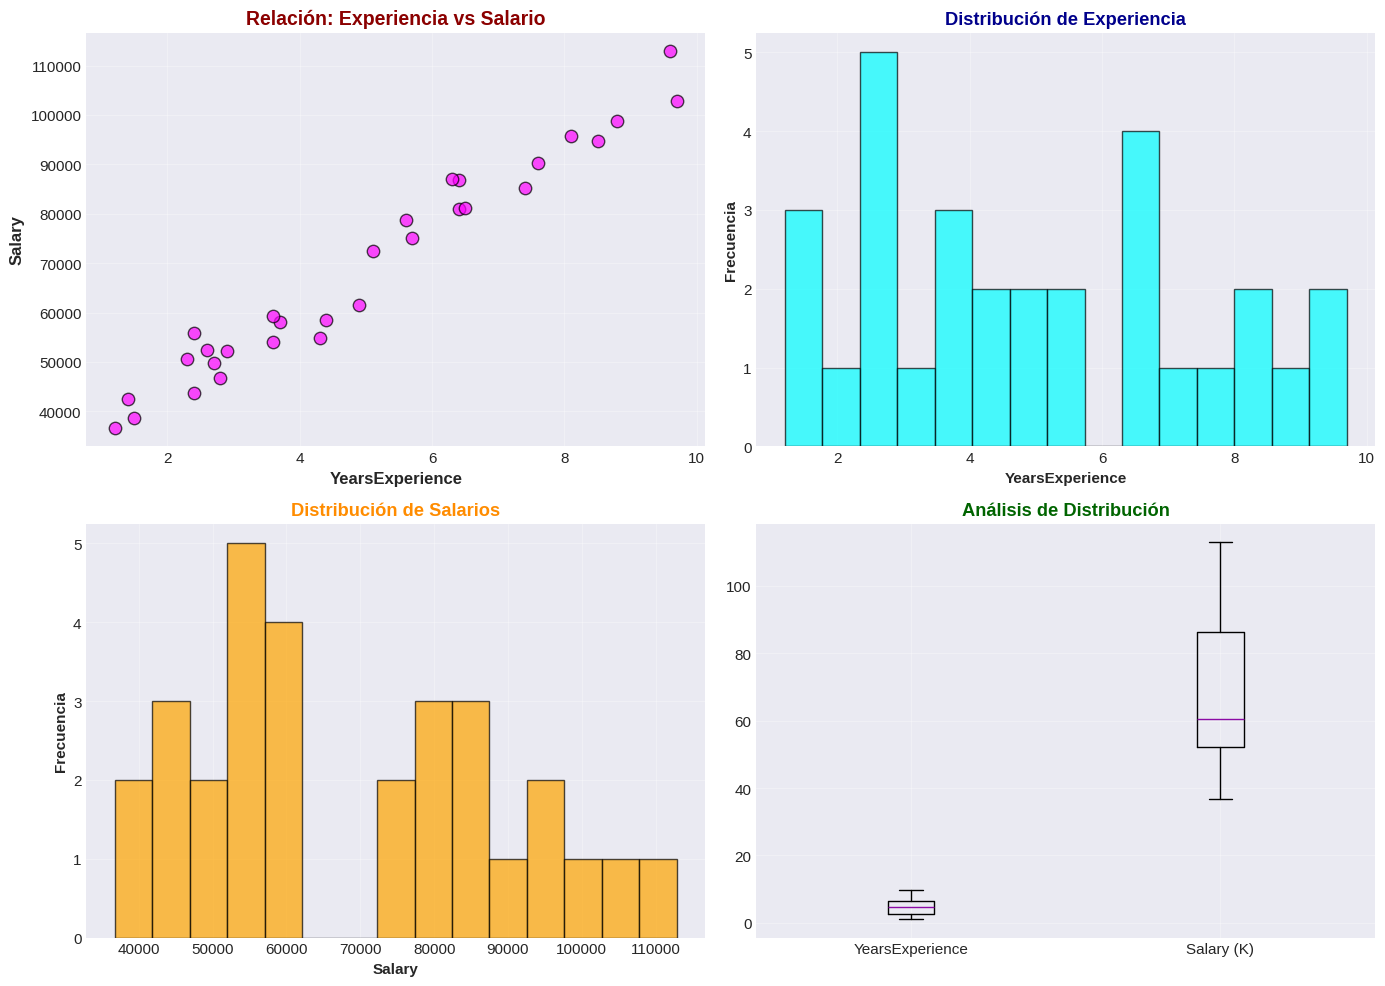


ANÁLISIS ESTADÍSTICO DETALLADO:
   • Media de YearsExperience: 4.95
   • Mediana de YearsExperience: 4.65
   • Desviación estándar de YearsExperience: 2.55
   • Media de Salary: $68,616.27
   • Mediana de Salary: $60,488.50
   • Desviación estándar de Salary: $21,319.25


True

In [4]:
#  Análisis exploratorio (complemento a sección 2)
analisisRegresionExperienciaSalarial.analisis_exploratorio()

---
# 3) DIVISIÓN DEL CONJUNTO DE DATOS

SECCIÓN 3: DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA
PREPARACIÓN DE VARIABLES:
   • Variable independiente (X): YearsExperience
   • Variable dependiente (y): Salary
   • Forma de X: (30, 1)
   • Forma de y: (30,)

CONFIGURACIÓN DE DIVISIÓN:
   • Porcentaje para entrenamiento: 80%
   • Porcentaje para prueba: 20%
   • Semilla aleatoria: 42

RESULTADOS DE LA DIVISIÓN:
   • Datos de entrenamiento:
     - X_train: 24 muestras
     - y_train: 24 muestras
   • Datos de prueba:
     - X_test: 6 muestras
     - y_test: 6 muestras

VERIFICACIÓN DE DISTRIBUCIÓN:
   • Rango X_train: [1.20, 9.70]
   • Rango X_test: [2.70, 7.40]
   • Rango y_train: [$36,712, $112,886]
   • Rango y_test: [$49,713, $86,803]


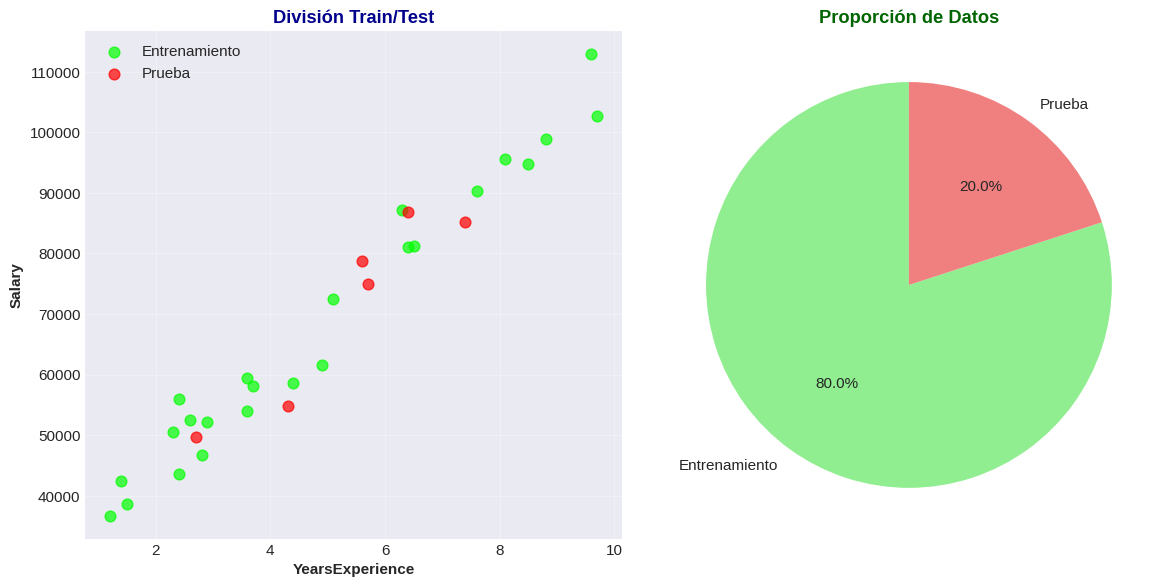


SECCIÓN 3 COMPLETADA


True

In [5]:
analisisRegresionExperienciaSalarial.seccion_3_division_datos()

---
# 4) ENTRENAMIENTO DEL MODELO
---

SECCIÓN 4: ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL
CONFIGURACIÓN DEL MODELO:
   • Algoritmo: Regresión Lineal Simple
   • Biblioteca: scikit-learn
   • Método: Mínimos Cuadrados Ordinarios

INICIALIZANDO MODELO...
ENTRENANDO MODELO CON DATOS DE ENTRENAMIENTO...
MODELO ENTRENADO EXITOSAMENTE
   • Tiempo de entrenamiento: 0.0019 segundos

PARÁMETROS DEL MODELO ENTRENADO:
   • Intercepto (β₀): $28,330.59
   • Pendiente (β₁): $8,153.20
   • Ecuación del modelo: y = 28330.59 + 8153.20 * x

INTERPRETACIÓN DE PARÁMETROS:
   • Intercepto: Salario base estimado para 0 años de experiencia
   • Pendiente: Incremento salarial por cada año adicional de experiencia
   • Por cada año de experiencia, el salario aumenta $8,153.20

MÉTRICAS EN DATOS DE ENTRENAMIENTO:
   • R² (Coeficiente de determinación): 0.9694
   • MAE (Error Absoluto Medio): $3,098.28
   • MSE (Error Cuadrático Medio): $15,122,329.33
   • RMSE (Raíz del Error Cuadrático Medio): $3,888.74

INTERPRETACIÓN DEL R²:
   • El modelo e

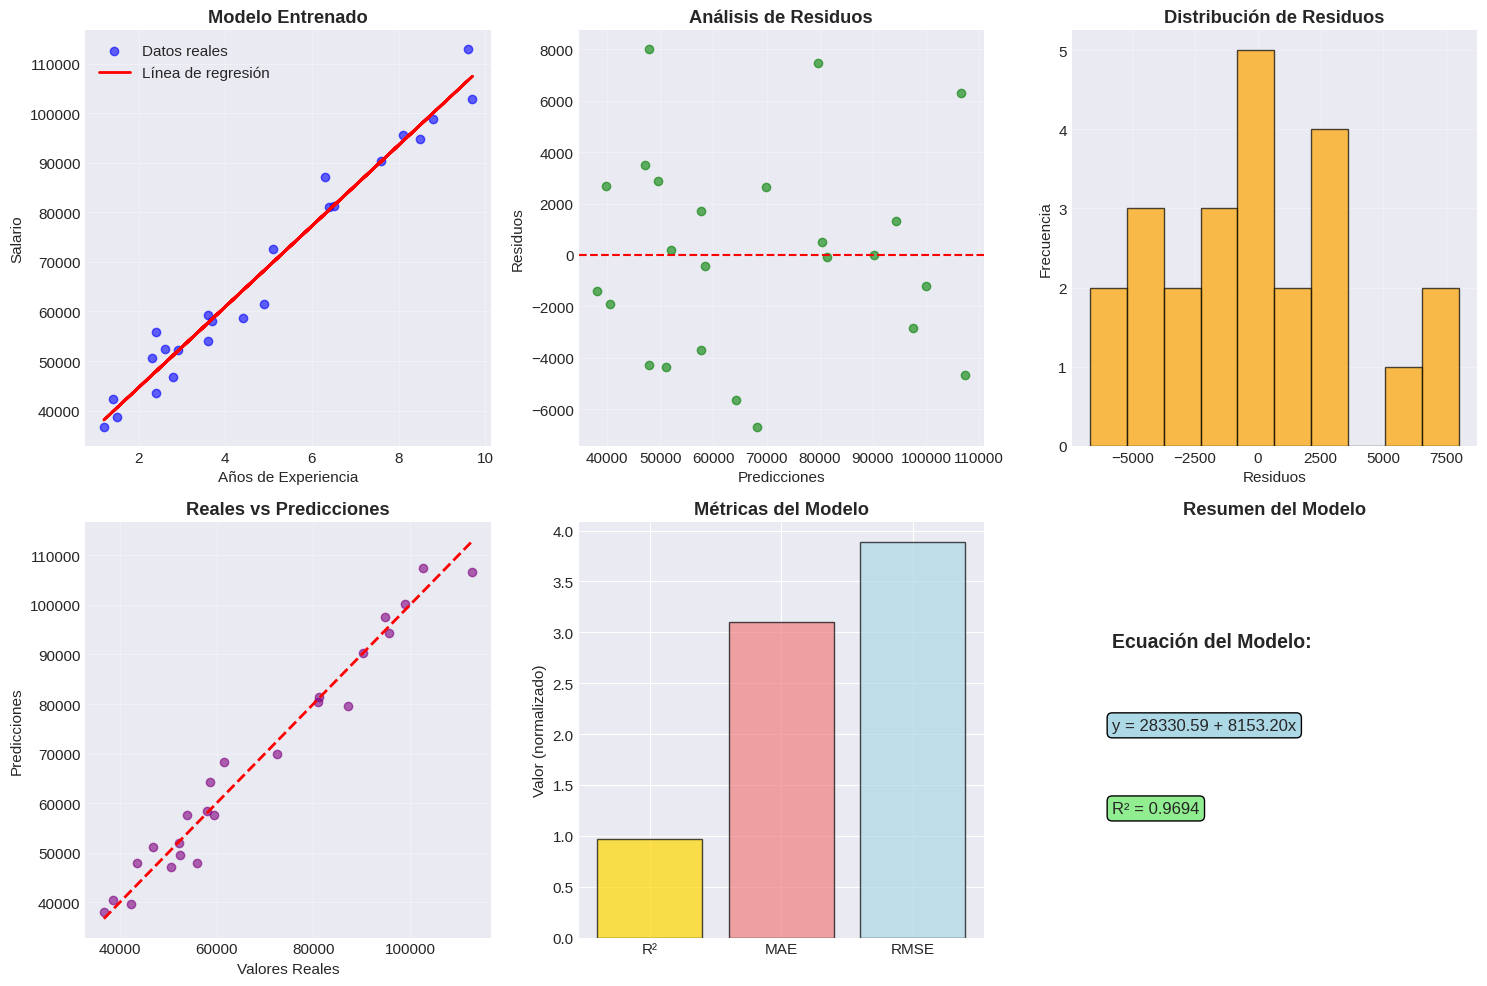


SECCIÓN 4 COMPLETADA


True

In [6]:
analisisRegresionExperienciaSalarial.seccion_4_entrenamiento_modelo()

---
# 5: VALIDACIÓN DEL MODELO 

SECCIÓN 5: VALIDACIÓN DEL MODELO CON DATOS DE PRUEBA
REALIZANDO PREDICCIONES EN DATOS DE PRUEBA...
   • Predicciones generadas para 6 muestras de prueba

MÉTRICAS EN DATOS DE PRUEBA:
   • R² (Coeficiente de determinación): 0.8815
   • MAE (Error Absoluto Medio): $3,964.24
   • MSE (Error Cuadrático Medio): $24,455,715.80
   • RMSE (Raíz del Error Cuadrático Medio): $4,945.27

COMPARACIÓN ENTRENAMIENTO vs PRUEBA:
   • R² - Entrenamiento: 0.9694 | Prueba: 0.8815
   • MAE - Entrenamiento: $3,098.28 | Prueba: $3,964.24
   • RMSE - Entrenamiento: $3,888.74 | Prueba: $4,945.27

ANÁLISIS DE SOBREAJUSTE:
   • Diferencia en R²: 0.0879
   • Buena generalización - sobreajuste mínimo

DETALLE DE PREDICCIONES EN DATOS DE PRUEBA:
   Experiencia | Salario Real | Predicción | Error Absoluto
   -------------------------------------------------------
        5.6 | $    78,711 | $   73,988 | $   4,723
        2.7 | $    49,713 | $   50,344 | $     631
        4.3 | $    54,860 | $   63,389 | $   8,529
  

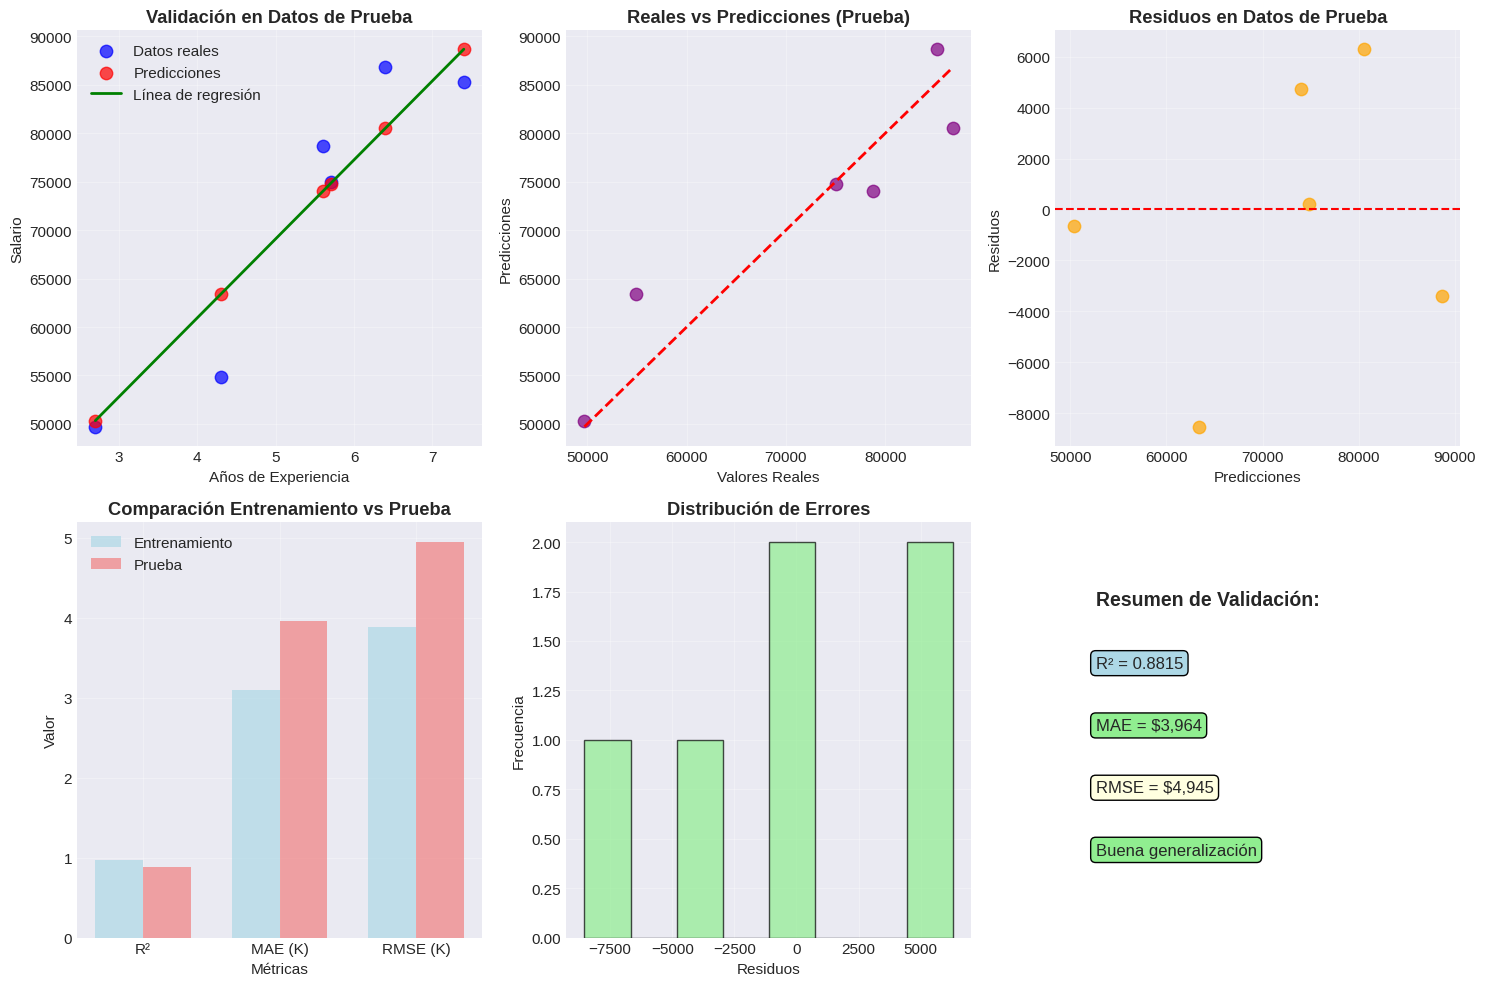


SECCIÓN 5 COMPLETADA


True

In [7]:
analisisRegresionExperienciaSalarial.seccion_5_validacion_modelo()

---
# 6) EVALUACIÓN DEL MODELO 
---

SECCIÓN 6: EVALUACIÓN COMPLETA DEL MODELO
MÉTRICAS DE RENDIMIENTO COMPLETAS:

   DATOS DE ENTRENAMIENTO:
   • R² (Coeficiente de determinación): 0.9694
   • MAE (Error Absoluto Medio): $3,098.28
   • MSE (Error Cuadrático Medio): $15,122,329.33
   • RMSE (Raíz del Error Cuadrático Medio): $3,888.74

   DATOS DE PRUEBA:
   • R² (Coeficiente de determinación): 0.8815
   • MAE (Error Absoluto Medio): $3,964.24
   • MSE (Error Cuadrático Medio): $24,455,715.80
   • RMSE (Raíz del Error Cuadrático Medio): $4,945.27

PARÁMETROS DEL MODELO FINAL:
   • Intercepto (β₀): $28,330.59
   • Pendiente (β₁): $8,153.20
   • Ecuación: Salario = 28330.59 + 8153.20 × Experiencia

INTERPRETACIÓN EMPRESARIAL:
   • Salario base (sin experiencia): $28,330.59
   • Incremento por año de experiencia: $8,153.20
   • Retorno de inversión en experiencia: 28.78% por año

ANÁLISIS DE CALIDAD DEL MODELO:
   • Calidad del ajuste: Muy bueno (R² = 0.8815)
   • Error porcentual medio: 5.53%
   • Precisión de predicciones:

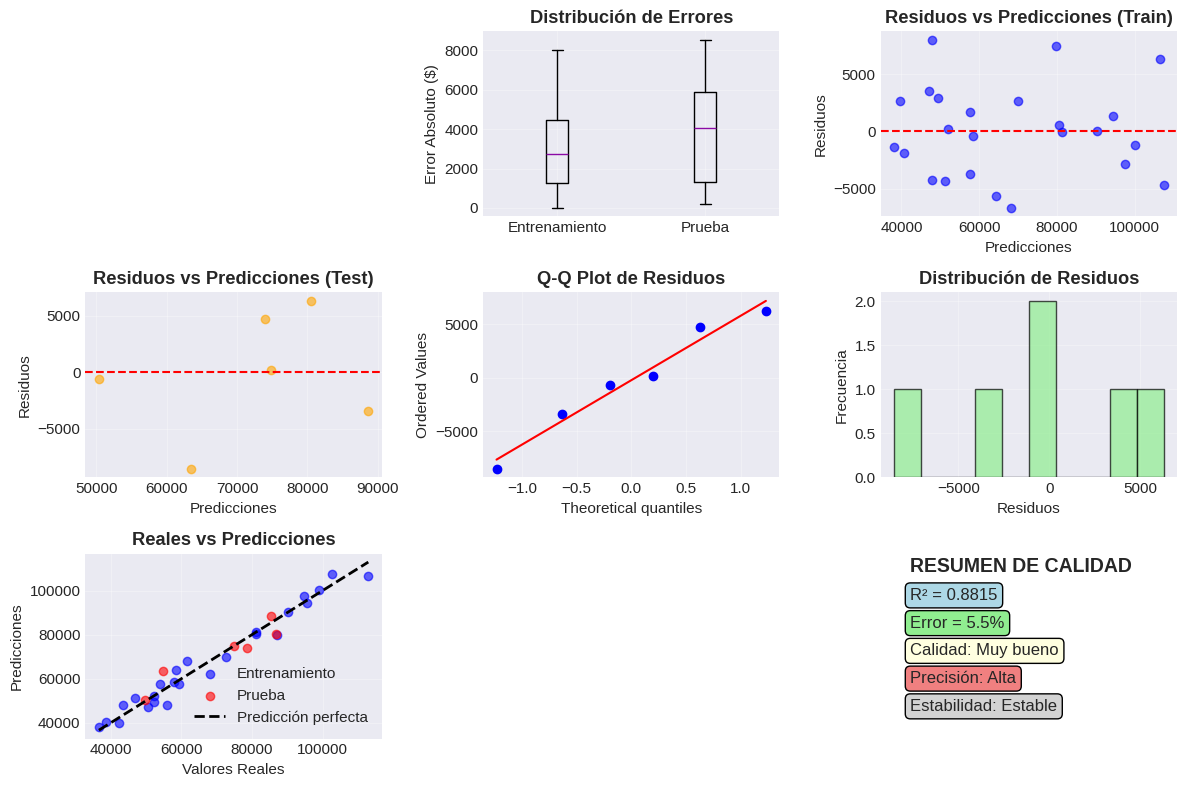


RECOMENDACIONES:
   • El modelo es altamente confiable para predicciones
   • Puede utilizarse para estimaciones salariales precisas
   • Actualizar el modelo periódicamente con nuevos datos
   • Validar predicciones con datos del mercado laboral actual

SECCIÓN 6 COMPLETADA


True

In [8]:
analisisRegresionExperienciaSalarial.seccion_6_evaluacion_modelo()

---
# 7) PREDICCIÓN DE NUEVOS VALORES
---

SECCIÓN 7: PREDICCIÓN CON NUEVOS VALORES
CASOS DE ESTUDIO PARA PREDICCIÓN:

   PREDICCIONES DETALLADAS:
   Experiencia | Descripción                    | Salario Predicho
   ----------------------------------------------------------------------
        0.5 | Recién graduado con prácticas  | $    32,407
        2.0 | Profesional junior             | $    44,637
        5.0 | Profesional con experiencia media | $    69,097
        8.0 | Profesional senior             | $    93,556
       12.0 | Experto con amplia experiencia | $   126,169
       15.0 | Líder de la industria          | $   150,629

   ANÁLISIS DE TENDENCIAS SALARIALES:
   • De 0.5 a 2.0 años: +$12,230 (37.7%)
   • De 2.0 a 5.0 años: +$24,460 (54.8%)
   • De 5.0 a 8.0 años: +$24,460 (35.4%)
   • De 8.0 a 12.0 años: +$32,613 (34.9%)
   • De 12.0 a 15.0 años: +$24,460 (19.4%)

   CASOS ESPECIALES DE INTERÉS:
   • Primer empleo formal (1.0 años): $36,484
   • Cambio de carrera profesional (3.5 años): $56,867
   • Promoción a 

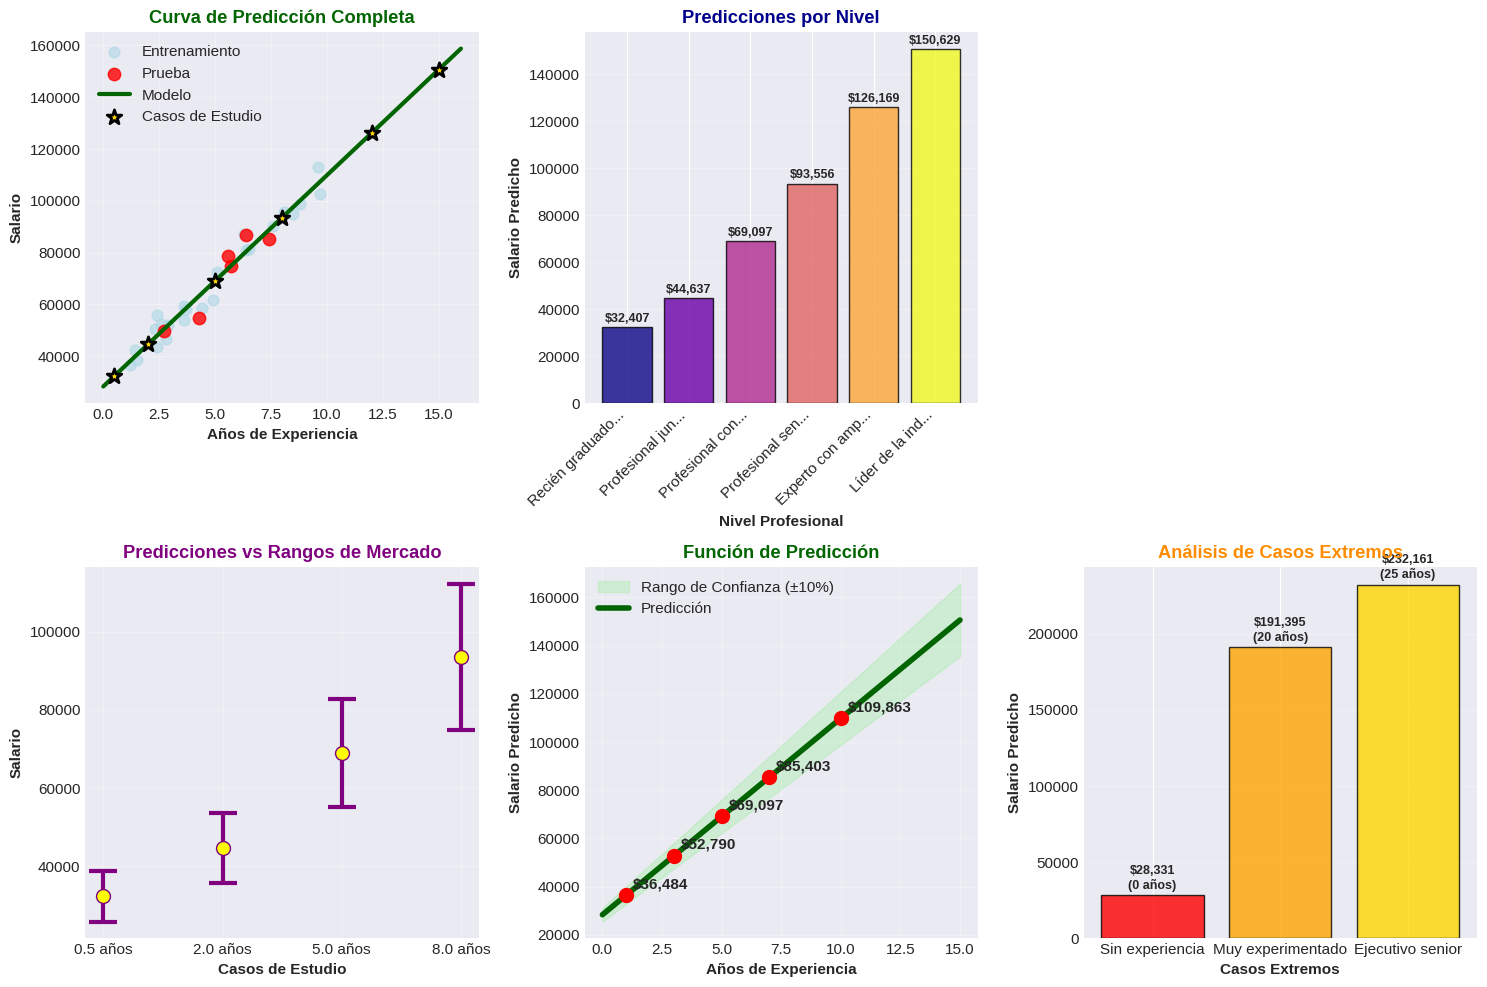


SECCIÓN 7 COMPLETADA


True

In [9]:
analisisRegresionExperienciaSalarial.seccion_7_prediccion_nuevos_valores()

---
# 8) ANÁLISIS Y CONCLUSIONES 
---

SECCIÓN 8: CONCLUSIONES Y RECOMENDACIONES

RESUMEN EJECUTIVO DEL ANÁLISIS:
--------------------------------------------------

1. MODELO DESARROLLADO:
   • Ecuación: Salario = 28,330.59 + 8,153.20 × Años_Experiencia
   • Interpretación: Por cada año adicional de experiencia,
     el salario aumenta aproximadamente $8,153

2. CALIDAD DEL MODELO:
   • R² (Coeficiente de Determinación): 0.8815 (88.15%)
   • Calidad del ajuste: EXCELENTE
   • Error Absoluto Medio: $3,964
   • Error Cuadrático Medio: $4,945

3. HALLAZGOS PRINCIPALES:
   • Salario base (sin experiencia): $28,331
   • Incremento salarial en 5 años: $40,766
   • Incremento salarial en 10 años: $81,532
   • ROI de la experiencia: 287.8% en 10 años
   • Correlación experiencia-salario: 0.9805
   • Fuerza de la relación: MUY FUERTE

CONCLUSIONES ESPECÍFICAS:
--------------------------------------------------

1. VALIDEZ DEL MODELO:
   ✓ El modelo de regresión lineal es APROPIADO para este dataset
   ✓ La relación entre experienci

True

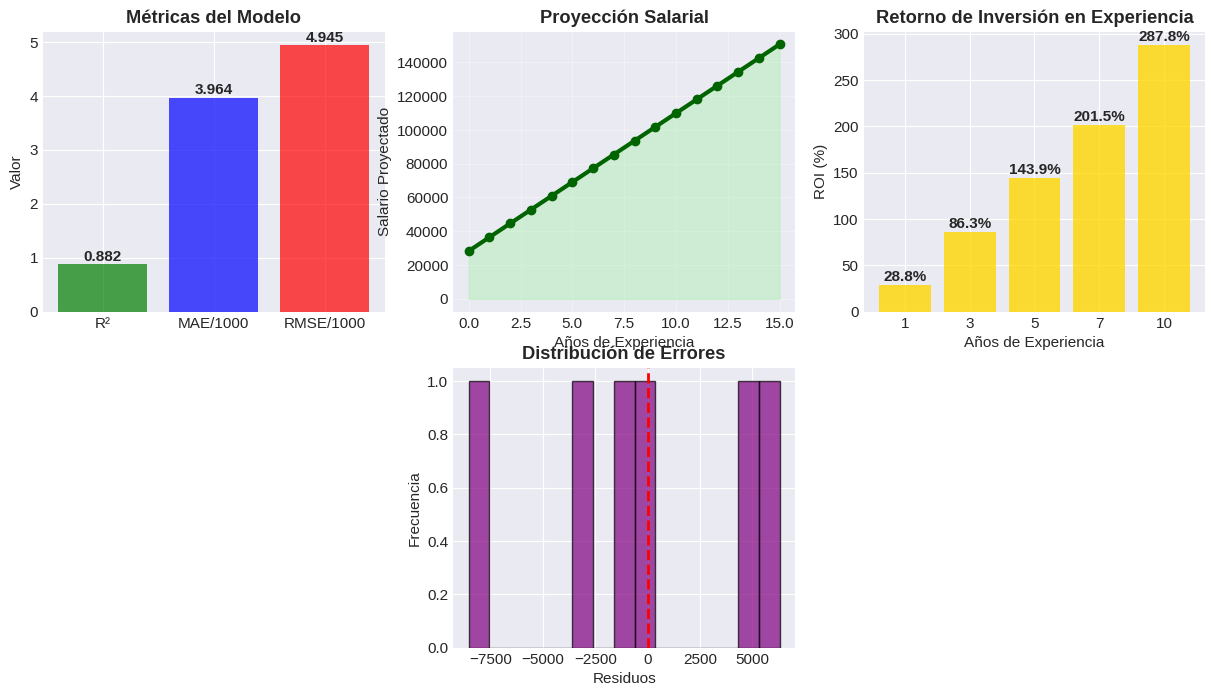

In [10]:
analisisRegresionExperienciaSalarial.seccion_8_conclusiones_recomendaciones()